# Apresentação, introdução, iniciação ao problema...

---

Esse é literalmente o banco de dados ou competição para quem está iniciando no mundo de aprendizado de máquina (podemos esclarecer eu), mais famoso até que o **House Prices**.

## Objetivo

Criar um modelo de aprendizado de máquina ou estatística para predizer se determinado passageiro, a partir de suas características, vai sobreviver ou não ao desastre do Titanic, isto é, uma variável binária com as classes 0 (Não, o passageiro não morreu) e 1 (Sim, o passageiro morreu).

## Variáveis utilizadas

Informações dos passageiros, como nome, idade, gênero e variáveis sócio-econômicas separadas em dados de treino e teste.

- Os dados de treino possuem 891 observações (passageiros).
- Os dados de teste possuem 418 observações (passageiros).

## Métrica 

A métrica para ser utilizada é a acurácia, ela provém da matriz de confusão (ver imagem abaixo).


![](https://miro.medium.com/max/1400/1*s7VB26Cfo1LdVZcLou-e0g.png "Logo Principal da Eagle Tecnologia")
**Nota**: Retirado de https://medium.com/@vitorborbarodrigues/m%C3%A9tricas-de-avalia%C3%A7%C3%A3o-acur%C3%A1cia-precis%C3%A3o-recall-quais-as-diferen%C3%A7as-c8f05e0a513c

A matriz de confusão é uma tabela onde comparamos os dados que realmente são verdadeiros e o que nosso modelo preveu para esses dados, dando a possibilidade de verificar o quanto nosso modelo preveu corretamente (acurácia) assim como outras métricas.

O cálculo da acurácia é dado por

$$ \mbox{Acurácia}  = \frac{\mbox{Verdadeiros Positivos (VP)} + \mbox{Verdadeiro Negativo (VN)}}{\mbox{Total}} $$

Nos dizendo os acertos, de qualquer classe (nesse caso Sim e Não), que tivemos em relação ao total.

Assim como há outras métricas que podemos retirar da matriz de confusão, ver este [link](https://medium.com/@vitorborbarodrigues/m%C3%A9tricas-de-avalia%C3%A7%C3%A3o-acur%C3%A1cia-precis%C3%A3o-recall-quais-as-diferen%C3%A7as-c8f05e0a513c).

Para mais detalhes da diferença entre acurácia e precisão, ver este [link](https://blog.idwall.co/o-que-e-acuracia/).

# Bibliotecas utilizadas

---

In [491]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use("seaborn-muted")
%matplotlib inline

# Lendo os dados de treino e teste

---

In [492]:
treino = pd.read_csv("train.csv")
teste = pd.read_csv("test.csv")

# Explorando os dados 

---

In [493]:
treino.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


---

## Dicionário das variáveis

Podemos observar que temos as seguinte estrutura de variáveis no banco:

In [494]:
treino.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


---

O que significa cada uma, segundo o [Kaggle](https://www.kaggle.com/c/titanic/data) é:

1. **PassengerId**: Um ID para identificar cada passageiro;
2. **Survived**: Se ele sobreviveu (0 = Não, 1 = Sim) - Qualitativa;
3. **Pclass**: Ticket que indica qual classe o passageiro estava (1 = 1st, 2 = 2nd, 3 = 3rd) - Qualitativa;
4. **Name**: Nome - Qualitativa;
5. **Sex**: Sexo - Qualitativa;
6. **Age**: Idade - Quantitativa;
7. **SibSp**: Nº de irmãos / cônjuges a bordo do Titanic - Quantitativa;
8. **Parch**: Nº de pais / filhos a bordo do Titanic - Quantitativa;
9. **Ticket**: Nº do ticket - Qualitativa;
10. **Fare**: Tarifa do passageiro - Quantitativa;
11. **Cabin**: Número da cabine - Qualitativa;
12. **Embarked**: Porto em que o passageiro embarcou - Qualitativa.

## Explorando a variável independente, target

Podemos verificar, inicialmente, qual a proporção de passageiros que sobreviveram ou não.

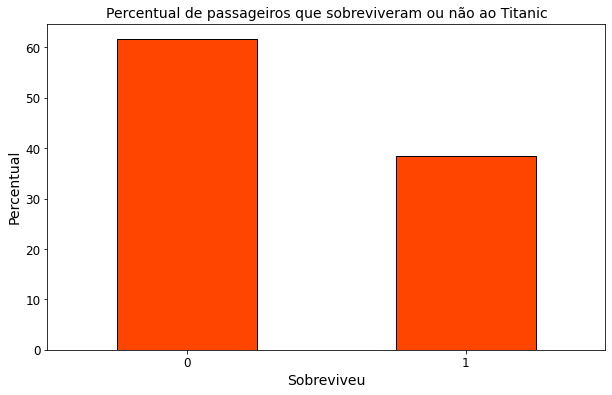

In [495]:
plt.figure(figsize = [10, 6])

treino["Survived"].value_counts(normalize = True).mul(100).plot(kind = "bar", color = "orangered", edgecolor = "black")
plt.title("Percentual de passageiros que sobreviveram ou não ao Titanic", fontsize = 14, color = "black")
plt.xlabel("Sobreviveu", fontsize = 14, color = "black")
plt.ylabel("Percentual", fontsize = 14, color = "black")
plt.tick_params(axis = "x", labelsize = 12, labelcolor = "black")
plt.tick_params(axis = "y", labelsize = 12, labelcolor = "black")
plt.xticks(rotation = 0)
plt.show()

Temos que, aproximadamente, 60% dos passageiros não sobreviveram e, consequentemente, aproximadamente 40\% sobreviveram. 

**Portanto, podemos concluir que**: nossos dados de treino não está balanceado (50/50) mas está próxima disso, possibilitando o uso da regressão logística como método de previsão para este caso. 

Para sabermos o número específico de pessoas que sobreviveram ou não, assim como o percentual, podemos mostrar a partir da seguinte tabela:

In [496]:
pd.concat([treino["Survived"].value_counts(), 
                treino["Survived"].value_counts(normalize = True).mul(100).round(2)],axis = 1, keys = ("Quantidade", "Percentual"))

,Quantidade,Percentual
0,549,61.62
1,342,38.38


---

## Explorando as variáveis explicativas (Univariada)

### Qualitativas

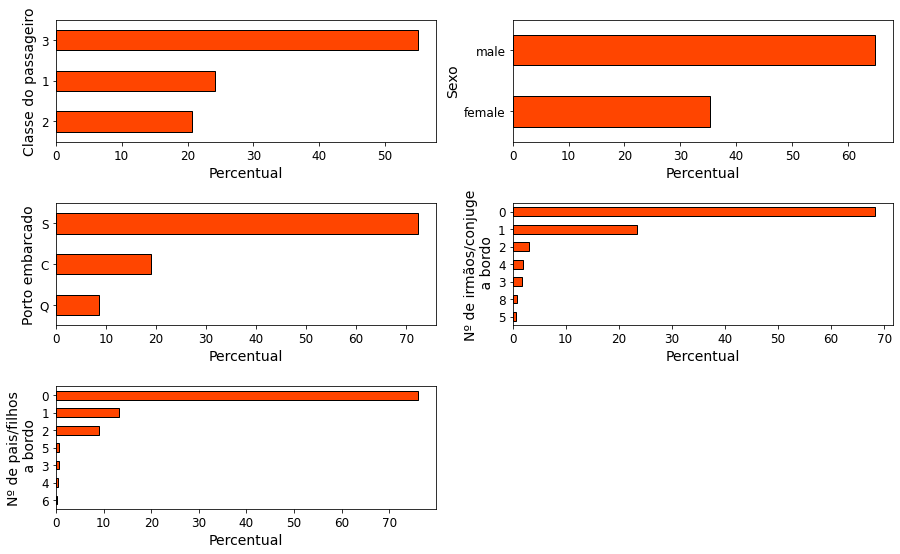

In [497]:
plt.figure(figsize = [15, 9])

#---

plt.subplot(3, 2, 1)

treino["Pclass"].value_counts(normalize = True, ascending = True).mul(100).plot(kind = "barh", color = "orangered", edgecolor = "black")
plt.xlabel("Percentual", fontsize = 14, color = "black")
plt.ylabel("Classe do passageiro", fontsize = 14, color = "black")
plt.tick_params(axis = "x", labelsize = 12, labelcolor = "black")
plt.tick_params(axis = "y", labelsize = 12, labelcolor = "black")
plt.xticks(rotation = 0)

plt.subplot(3, 2, 2)

treino["Sex"].value_counts(normalize = True, ascending = True).mul(100).plot(kind = "barh", color = "orangered", edgecolor = "black")
plt.xlabel("Percentual", fontsize = 14, color = "black")
plt.ylabel("Sexo", fontsize = 14, color = "black")
plt.tick_params(axis = "x", labelsize = 12, labelcolor = "black")
plt.tick_params(axis = "y", labelsize = 12, labelcolor = "black")
plt.xticks(rotation = 0)

plt.subplot(3, 2, 3)

treino["Embarked"].value_counts(normalize = True, ascending = True).mul(100).plot(kind = "barh", color = "orangered", edgecolor = "black")
plt.xlabel("Percentual", fontsize = 14, color = "black")
plt.ylabel("Porto embarcado", fontsize = 14, color = "black")
plt.tick_params(axis = "x", labelsize = 12, labelcolor = "black")
plt.tick_params(axis = "y", labelsize = 12, labelcolor = "black")
plt.xticks(rotation = 0)

plt.subplot(3, 2, 4)

treino["SibSp"].value_counts(normalize = True, ascending = True).mul(100).plot(kind = "barh", color = "orangered", edgecolor = "black")
plt.xlabel("Percentual", fontsize = 14, color = "black")
plt.ylabel("Nº de irmãos/conjuge\n a bordo", fontsize = 14, color = "black")
plt.tick_params(axis = "x", labelsize = 12, labelcolor = "black")
plt.tick_params(axis = "y", labelsize = 12, labelcolor = "black")
plt.xticks(rotation = 0)

plt.subplot(3, 2, 5)

treino["Parch"].value_counts(normalize = True, ascending = True).mul(100).plot(kind = "barh", color = "orangered", edgecolor = "black")
plt.xlabel("Percentual", fontsize = 14, color = "black")
plt.ylabel("Nº de pais/filhos\n a bordo", fontsize = 14, color = "black")
plt.tick_params(axis = "x", labelsize = 12, labelcolor = "black")
plt.tick_params(axis = "y", labelsize = 12, labelcolor = "black")
plt.xticks(rotation = 0)

        

#---

plt.subplots_adjust(hspace = 0.5)
plt.show()

---

**A partir dos gráficos acima podemos notar que:**

1. A maioria dos passageiros eram da 3ª classe. O Kaggle informa que essa é uma variável proxy sócio-econômica, também indicando que a pessoa tinha um poder aquisitivo mais baixo que as demais;

2. A maioria dos passageiros no Titanic era do sexo masculino;

3. O porto S foi o que mais embarcou pessoas para o Titanic;

4. Grande parte das pessoas estavam viajando sem acompanhantes familiares.

### Quantitativas

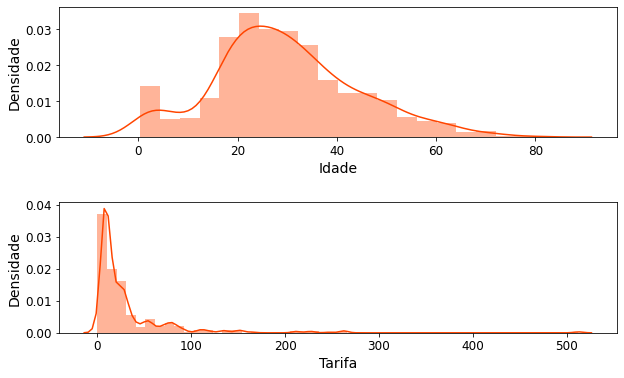

In [498]:
plt.figure(figsize = [10, 6])

#---

plt.subplot(2, 1, 1)

sns.distplot(treino["Age"], color = "orangered")
plt.xlabel("Idade", fontsize = 14, color = "black")
plt.ylabel("Densidade", fontsize = 14, color = "black")
plt.tick_params(axis = "x", labelsize = 12, labelcolor = "black")
plt.tick_params(axis = "y", labelsize = 12, labelcolor = "black")

plt.subplot(2, 1, 2)

sns.distplot(treino["Fare"], color = "orangered")
plt.xlabel("Tarifa", fontsize = 14, color = "black")
plt.ylabel("Densidade", fontsize = 14, color = "black")
plt.tick_params(axis = "x", labelsize = 12, labelcolor = "black")
plt.tick_params(axis = "y", labelsize = 12, labelcolor = "black")


plt.subplots_adjust(hspace = 0.5)
plt.show()

**Podemos notar que:**

1. A idade possui valores mais frequentes na faixa dos 20 anos, logo, muitos eram passageiros jovens;

2. Grande parte dos passageiros pagaram tarifas baixas, podendo estar relacionado com o que vimos nos primeiros gráficos, que muitos eram da 3ª classe.

### Outras variáveis qualitativas (Name, Ticket e Cabin)

Aqui já fica de sugestão para mim (e para você verificar se há algum padrão nestas variáveis). Estas variáveis, devido ser a baseline, não irão para o modelo.

In [499]:
treino[["Name", "Ticket", "Cabin"]].head()

,Name,Ticket,Cabin
0,"Braund, Mr. Owen Harris",A/5 21171,NaN
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",PC 17599,C85
2,"Heikkinen, Miss. Laina",STON/O2. 3101282,NaN
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",113803,C123
4,"Allen, Mr. William Henry",373450,NaN


## Explorando a relação entre variáveis (bivariada)

<Figure size 720x432 with 0 Axes>

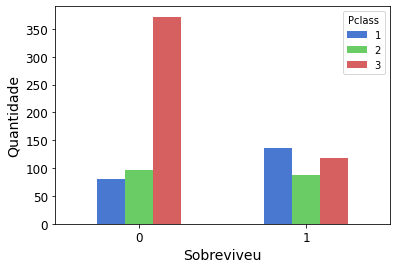

In [500]:
#--- Sobreviveu x Classe

plt.figure(figsize = [10, 6])

treino[["Survived", "Pclass"]].reset_index().groupby(["Survived", "Pclass"], as_index = False).size().unstack().plot.bar()
plt.xlabel("Sobreviveu", fontsize = 14, color = "black")
plt.ylabel("Quantidade", fontsize = 14, color = "black")
plt.tick_params(axis = "x", labelsize = 12, labelcolor = "black")
plt.tick_params(axis = "y", labelsize = 12, labelcolor = "black")
plt.xticks(rotation = 0)
plt.show()

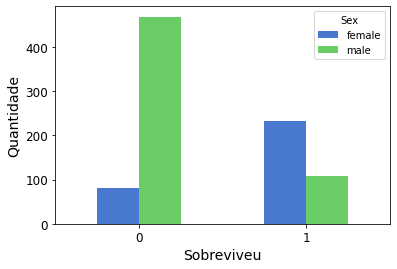

In [501]:
#--- Sobreviveu x Sexo

treino[["Survived", "Sex"]].reset_index().groupby(["Survived", "Sex"], as_index = False).size().unstack().plot.bar()
plt.xlabel("Sobreviveu", fontsize = 14, color = "black")
plt.ylabel("Quantidade", fontsize = 14, color = "black")
plt.tick_params(axis = "x", labelsize = 12, labelcolor = "black")
plt.tick_params(axis = "y", labelsize = 12, labelcolor = "black")
plt.xticks(rotation = 0)
plt.show()

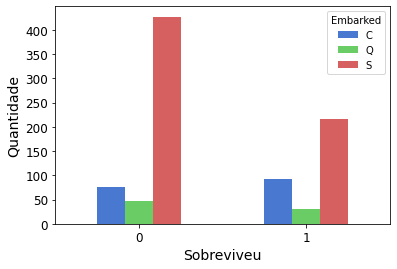

In [502]:
#--- Sobreviveu x Porto embarcado

treino[["Survived", "Embarked"]].reset_index().groupby(["Survived", "Embarked"], as_index = False).size().unstack().plot.bar()
plt.xlabel("Sobreviveu", fontsize = 14, color = "black")
plt.ylabel("Quantidade", fontsize = 14, color = "black")
plt.tick_params(axis = "x", labelsize = 12, labelcolor = "black")
plt.tick_params(axis = "y", labelsize = 12, labelcolor = "black")
plt.xticks(rotation = 0)
plt.show()

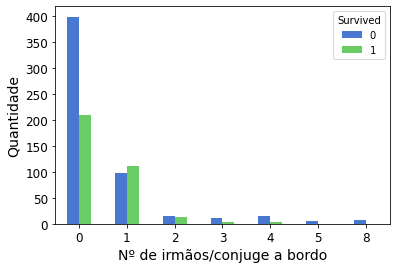

In [503]:
#--- Sobreviveu x Nº de irmãos/conjuge a bordo

treino[["SibSp", "Survived"]].reset_index().groupby(["SibSp", "Survived"], as_index = False).size().unstack().plot.bar()
plt.xlabel("Nº de irmãos/conjuge a bordo", fontsize = 14, color = "black")
plt.ylabel("Quantidade", fontsize = 14, color = "black")
plt.tick_params(axis = "x", labelsize = 12, labelcolor = "black")
plt.tick_params(axis = "y", labelsize = 12, labelcolor = "black")
plt.xticks(rotation = 0)
plt.show()

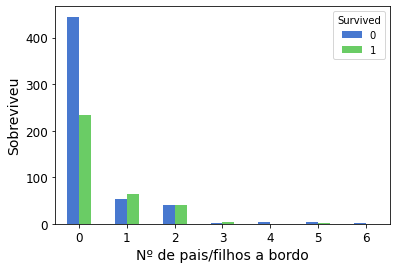

In [504]:
#--- Sobreviveu x Nº de pais/filhos a bordo

treino[["Parch", "Survived"]].reset_index().groupby(["Parch", "Survived"], as_index = False).size().unstack().plot.bar()
plt.xlabel("Nº de pais/filhos a bordo", fontsize = 14, color = "black")
plt.ylabel("Sobreviveu", fontsize = 14, color = "black")
plt.tick_params(axis = "x", labelsize = 12, labelcolor = "black")
plt.tick_params(axis = "y", labelsize = 12, labelcolor = "black")
plt.xticks(rotation = 0)
plt.show()

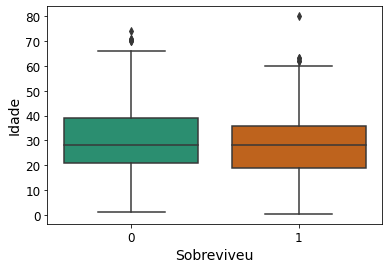

In [505]:
sns.boxplot(x = treino["Survived"], y = treino["Age"], data = treino, palette = "Dark2")
plt.xlabel("Sobreviveu", fontsize = 14, color = "black")
plt.ylabel("Idade", fontsize = 14, color = "black")
plt.tick_params(axis = "x", labelsize = 12, labelcolor = "black")
plt.tick_params(axis = "y", labelsize = 12, labelcolor = "black")
plt.xticks(rotation = 0)

plt.show()

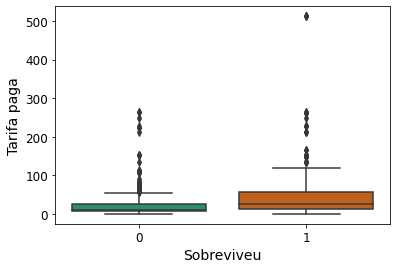

In [506]:
sns.boxplot(x = treino["Survived"], y = treino["Fare"], data = treino, palette = "Dark2")
plt.xlabel("Sobreviveu", fontsize = 14, color = "black")
plt.ylabel("Tarifa paga", fontsize = 14, color = "black")
plt.tick_params(axis = "x", labelsize = 12, labelcolor = "black")
plt.tick_params(axis = "y", labelsize = 12, labelcolor = "black")
plt.xticks(rotation = 0)

plt.show()

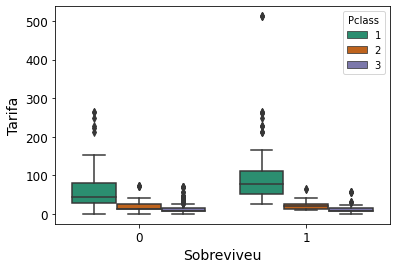

In [507]:
sns.boxplot(x = "Survived", y = "Fare", hue = "Pclass",
                 data = treino, palette = "Dark2")
plt.xlabel("Sobreviveu", fontsize = 14, color = "black")
plt.ylabel("Tarifa", fontsize = 14, color = "black")
plt.tick_params(axis = "x", labelsize = 12, labelcolor = "black")
plt.tick_params(axis = "y", labelsize = 12, labelcolor = "black")
plt.xticks(rotation = 0)

plt.show()

# Regressão logística

---

## Modelo

**Hair et al. (2009)** nos mostram que a regressão logística é utilizada para **modelar** (buscar entender a relação entre as variáveis) e **prever** dados futuros. É utilizada quando a nossa variável independente (y, target, etc.) é binária (justamente nosso caso, já que queremos prever quem sobreviveu ou não no desastre do Titanic) e possuímos uma ou mais variáveis dependentes (explicativas). Estas variáveis explicativas podem ser de natureza binária, categórica (nominal e ordinal) ou contínuas.

A função logística é dada por

$$ P(x) = \frac{exp(\beta_0 + \sum_{k = 1}^{p}\beta_k X_k)}{1 + exp(\beta_0 + \sum_{k = 1}^{p}\beta_k X_k)} $$ 

E tem a seguinte distribuição:


![](https://upload.wikimedia.org/wikipedia/commons/thumb/8/88/Logistic-curve.svg/600px-Logistic-curve.svg.png)

- Dado que os Betas (0 e k) serão estimados pelo método da máxima verossimilhança (ver mais neste [material da ESALQ](http://cmq.esalq.usp.br/BIE5781/lib/exe/fetch.php?media=leituras:verossim.pdf));

- X_k são as variáveis dependentes (features) que irão para o modelo.



## Modelagem

**Para modelar**, isto é, verificar a relação entre variáveis iremos utilizar a *Odds Ratio*. Ela é a razão entre a chance de um grupo exposto a uma determinada característica pela chance de um grupo que não foi exposto também apresentar a mesma ocorrência. É dada por

$$ \mbox{OR} = \frac{chance_1}{chance_0} $$ 

### Teste de Wald para os coeficientes

Para verificar quais variáveis são significantes para a modelagem e fazer a interpretação a partir da *Odds Ratio*, os coeficientes de cada variável utilizada no modelo precisam ser significativos. As hipóteses para este teste, para cada variável, são:

$ H_0: \beta_k = 0 $

$ H_1: \beta_k \neq 0 $

Neste caso, iremos utilizar o nível de significância de 5%. Podendo chegar a seguinte regra:

> Se o **p-valor** do teste >= 0.05: A variável pode ser utilizada para fazermos a modelagem (logo, esta é significante no modelo);

> Se **p-valor** do teste < 0.05: A variável não pode ser utilizada para fazermos a modelagem (logo, esta não é significante no modelo).

## Previsão

**Para previsão**, assim como no neste caso que estamos prevendo para uma variável binária (variável qualitativa que possui apenas duas classes) a logística também é utilizada para casos em que a variável pode ter classes $ > 2 $.

## Lidando com variáveis qualitativas

Se as variáveis são qualitativas/categóricas podemos utilizar dummies com o *OneHotEncoding* ou com o `get_dummies` do pandas. 

No modelo iremos setar uma classe de referência (para que possamos comparar) para cada variável categórica, pois é deste jeito que comparamos e buscamos entender a relação entre as classes de variáveis.

# Pré-processamento dos dados

---

## Concatenar os dados de treino e teste

In [508]:
survived = treino["Survived"]

survived

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [509]:
treino.drop(["Survived"], axis = 1, inplace = True)

treino_index = treino.shape[0]
teste_index = teste.shape[0]

banco_geral = pd.concat(objs = [treino, teste], axis = 0).reset_index(drop = True)

In [510]:
banco_geral.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [511]:
banco_geral.shape

(1309, 11)

## Visualizando os dados missings

Podemos observar que a variável:

1. **Cabin** (uma variável que já iríamos excluir da análise) apresenta cerca de 700 valores nulos de 891 valores disponíveis, apenas nos mostrando mais um motivo para retirá-la.

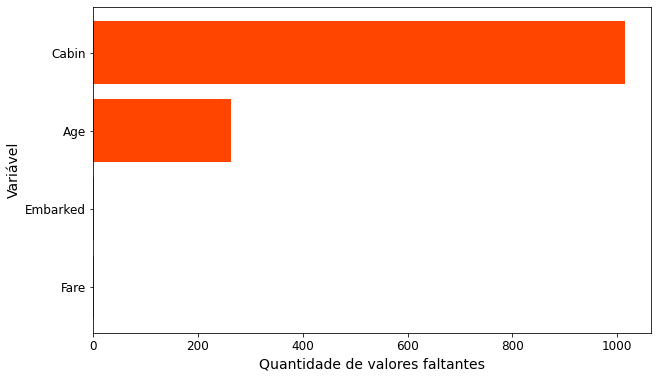

In [512]:
miss_val_treino = banco_geral.isnull().sum()

miss_val_treino = miss_val_treino[miss_val_treino > 0]

dados_miss_val_treino = pd.DataFrame(miss_val_treino)

dados_miss_val_treino = dados_miss_val_treino.reset_index().sort_values(by = 0, ascending = True)

dados_miss_val_treino
dados_miss_val_treino.columns = ["Variável", "Quantidade"]



plt.figure(figsize = [10, 6])
plt.barh(dados_miss_val_treino["Variável"], dados_miss_val_treino["Quantidade"], align = "center", color = "orangered")
plt.xlabel("Quantidade de valores faltantes", fontsize = 14, color = "black")
plt.ylabel("Variável", fontsize = 14, color = "black")
plt.tick_params(axis = "x", labelsize = 12, labelcolor = "black")
plt.tick_params(axis = "y", labelsize = 12, labelcolor = "black")
plt.show()

## Seleção de variáveis

In [513]:
banco_geral = banco_geral.drop(["PassengerId", "Name", "Ticket", "Cabin"], axis = 1)

In [514]:
banco_geral.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,22.0,1,0,7.2500,S
1,1,female,38.0,1,0,71.2833,C
2,3,female,26.0,0,0,7.9250,S
3,1,female,35.0,1,0,53.1000,S
4,3,male,35.0,0,0,8.0500,S


## Transformando a variável Pclass

In [515]:
banco_geral["Pclass"] = banco_geral["Pclass"].astype(str)

## Tratando dados missings

### Age

Vamos substituir pela moda os valores nulos.

In [516]:
banco_geral["Age"] = banco_geral["Age"].fillna(banco_geral["Age"].mode()[0])

### Embarked

In [517]:
banco_geral["Embarked"] = banco_geral["Embarked"].fillna("SI")

### Fare

Substituir pela moda também.

In [518]:
banco_geral["Fare"] = banco_geral["Fare"].fillna(banco_geral["Fare"].mode()[0])

banco_geral.isnull().sum()

Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

## OneHotEncode nas variáveis qualitativas/categóricas

In [519]:
banco_geral = pd.get_dummies(banco_geral)

In [520]:
banco_geral.head()

,Age,SibSp,Parch,Fare,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Embarked_SI
0,22.0,1,0,7.2500,0,0,1,0,1,0,0,1,0
1,38.0,1,0,71.2833,1,0,0,1,0,1,0,0,0
2,26.0,0,0,7.9250,0,0,1,1,0,0,0,1,0
3,35.0,1,0,53.1000,1,0,0,1,0,0,0,1,0
4,35.0,0,0,8.0500,0,0,1,0,1,0,0,1,0


## Separando em treino e teste novamente

In [521]:
treino1 = banco_geral.iloc[:treino_index]

print("Dimensões do novos dados de treino")

treino1.shape

Dimensões do novos dados de treino


(891, 13)

In [522]:
teste1 = banco_geral.iloc[:teste_index]

print("Dimensões do novos dados de teste")

teste1.shape

Dimensões do novos dados de teste


(418, 13)

In [523]:
treino1 = treino1.assign(Survived = survived)

treino1.head()

,Age,SibSp,Parch,Fare,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Embarked_SI,Survived
0,22.0,1,0,7.2500,0,0,1,0,1,0,0,1,0,0
1,38.0,1,0,71.2833,1,0,0,1,0,1,0,0,0,1
2,26.0,0,0,7.9250,0,0,1,1,0,0,0,1,0,1
3,35.0,1,0,53.1000,1,0,0,1,0,0,0,1,0,1
4,35.0,0,0,8.0500,0,0,1,0,1,0,0,1,0,0


## Separando os dados de treino em validação também

In [524]:
from sklearn.model_selection import train_test_split

x_treino, x_valid, y_treino, y_valid = train_test_split(treino1.drop("Survived", axis = 1), treino1["Survived"], train_size = 0.5, random_state = 1234)

In [525]:
print("Os dados de treino possui dimensões:", treino1.shape)
print("----" * 15)
print("x_treino possui dimensões:", x_treino.shape)
print("----" * 15)
print("y_treino possui dimensões:", y_treino.shape)
print("----" * 15)
print("x_valid possui dimensões:", x_valid.shape)
print("----" * 15)
print("y_valid possui dimensões:", y_valid.shape)

Os dados de treino possui dimensões: (891, 14)
------------------------------------------------------------
x_treino possui dimensões: (445, 13)
------------------------------------------------------------
y_treino possui dimensões: (445,)
------------------------------------------------------------
x_valid possui dimensões: (446, 13)
------------------------------------------------------------
y_valid possui dimensões: (446,)


# Aplicação da regressão logística

---

Agora que fizemos todos os passos de tratamento dos dados, podemos fazer a aplicação da regressão logística.

## Relação entre variáveis

Para entender a relação entre as variáveis, como mencionado anteriormente, temos que escolher uma classe de cada variável categórica para entrar como referência, elas são:

1. **P_class** referência: 1ª classe;
2. **Sex** referência: Masculino;
3. **Embarked** referência: Porto "S".

Estas classes referências serão retiradas do banco de dados que irá para regressão.

E, também, adicionando o intercepto da regressão.

In [526]:
x_treino1 = x_treino[["Age", "SibSp", "Parch", "Fare", "Pclass_2", "Pclass_3", "Sex_female", "Embarked_C", "Embarked_Q", "Embarked_SI"]]

x_treino1["intercepto"] = 1.0

C:\Users\Rafael\miniconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


Com os dados prontos para colocar na regressão, iremos utilizar (para a **modelagem**) a biblioteca `statsmodel` e, assim, treinamos a regressão e vemos um sumário.

Com a tabela abaixo, podemos tirar as seguintes conclusões:

- Variáveis não significativas:

    1. Parch (Nº de pais / filhos a bordo);
    2. Fare (Tarifa);
    3. Todas os portos de Embarked (nenhum pouco significativos, diga-se de passagem).
    
- Pseudo R-squ aceitável, segundo o [artigo](https://qastack.com.br/stats/82105/mcfaddens-pseudo-r2-interpretation)

In [527]:
import statsmodels.api as sm

log_mod_sm = sm.Logit(y_treino, x_treino1).fit()

print(log_mod_sm.summary())

         Current function value: 0.433812
         Iterations: 35
                           Logit Regression Results                           
Dep. Variable:               Survived   No. Observations:                  445
Model:                          Logit   Df Residuals:                      434
Method:                           MLE   Df Model:                           10
Date:                Mon, 11 May 2020   Pseudo R-squ.:                  0.3554
Time:                        12:12:01   Log-Likelihood:                -193.05
converged:                      False   LL-Null:                       -299.49
Covariance Type:            nonrobust   LLR p-value:                 3.287e-40
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
Age            -0.0413      0.011     -3.814      0.000      -0.063      -0.020
SibSp          -0.3500      0.157     -2.229      0.026      -

C:\Users\Rafael\miniconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


---

Para verificarmos os *odds_ratio* temos que rodar o comando: `np.exp(log_mod_sm.params)`.

Com isto, temos as seguintes conclusões:

1. Pclass:

    - P_class2: 
    
    - P_class3: 
    
2. Sexo:

    - 

In [536]:
odds_ratio_banco = pd.DataFrame(np.exp(log_mod_sm.params).round(2)).reset_index()

odds_ratio_banco.columns = ["Variável", "Odds ratio"]

var_retirar = ["Parch", "Fare", "Embarked_C", "Embarked_Q", "Embarked_SI"]

odds_ratio_banco.loc[~ odds_ratio_banco['Variável'].isin(var_retirar)]

,Variável,Odds ratio
0,Age,0.96
1,SibSp,0.70
4,Pclass_2,0.28
5,Pclass_3,0.07
6,Sex_female,15.55
10,intercepto,4.13


In [279]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

logreg = LogisticRegression(max_iter = 500, random_state = 1234)
logreg.fit(x_treino, y_treino)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=500,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=1234, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [148]:
logreg.score

<bound method ClassifierMixin.score of LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=500,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=1234, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)>

In [92]:
previsao = logreg.predict(x_valid)

previsao[:6]

array([1, 0, 0, 1, 0, 0], dtype=int64)

## Matriz de confusão

In [93]:
from sklearn.metrics import confusion_matrix

confusion_matrix = confusion_matrix(y_valid, previsao)

print(confusion_matrix)

[[261  21]
 [ 60 104]]


## Acurácia nos dados de validação

In [94]:
logreg.score(x_valid, y_valid)

0.8183856502242153

## Outras métricas

In [40]:
from sklearn.metrics import classification_report

print(classification_report(y_valid, previsao))

              precision    recall  f1-score   support

           0       0.85      0.85      0.85       282
           1       0.74      0.74      0.74       164

    accuracy                           0.81       446
   macro avg       0.79      0.79      0.79       446
weighted avg       0.81      0.81      0.81       446



## Baseline

A baseline obteve acurácia de 0.8071748878923767. Agora iremos tentar melhorar essa baseline a partir de transformações nas variáveis.

Esse notebook pode ser acessado aqui.

# Referências

---

## Regressão logística

1. Hair, J. F., Black, W. C., Babin, B. J., Anderson, R. E., & Tatham, R. L. (2009). **Análise multivariada de dados**. Bookman Editora.
2. https://matheusfacure.github.io/2017/02/25/regr-log/#intro
3. http://pro.poli.usp.br/wp-content/uploads/2012/pubs/uso-de-regressao-logistica-para-previsao-de-fechamento-de-operacoes-financeiras-termo-de-moedas.pdf

## Regressão logística com Python

1. https://towardsdatascience.com/building-a-logistic-regression-in-python-step-by-step-becd4d56c9c8
2. https://mashimo.wordpress.com/2017/07/26/logistic-regression-with-python-statsmodels/
3. http://blog.yhat.com/posts/logistic-regression-and-python.html

## Prevendo para os dados de teste

In [41]:
previsoes_subm = logreg.predict(teste1)

previsoes_subm[:6]

array([0, 1, 1, 1, 0, 0], dtype=int64)

In [42]:
id_teste = teste["PassengerId"]

subm = pd.DataFrame()

subm["PassengerId"] = id_teste
subm["Survived"] = previsoes_subm

In [43]:
subm.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,1
3,895,1
4,896,0


In [44]:
# subm.to_csv("subm1.csv", index = False)